# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**


The used car market in India is witnessing a rapid surge in demand. While new car sales are witnessing a slow revival after the pandemic shock in 2020 and turbulent performance in 2021, the used car market is continuing to see a constant growth in demand. The increasing consumer demand for cost-effective and affordable vehicles with enhanced mobility, convenience, and safety is primarily driving the used car market in India.

According to a study by research firm Frost & Sullivan and commissioned by Volkswagen India, the growth will primarily be driven by used car sales, projected to outnumber new car volumes by over 2:1 by FY2025. Used car sales will grow at a faster pace. In FY2021, the pre-owned sector in India stood at 3.8 million units, making it 1.5 times more significant than the 2.6 million units new car market. Read more about this in [Business Today.]
 
https://www.businesstoday.in/auto/story/heres-why-indias-used-car-market-is-touted-to-double-in-five-years-347737-2022-09-20

[Business Today]: https://www.businesstoday.in/auto/story/heres-why-indias-used-car-market-is-touted-to-double-in-five-years-347737-2022-09-20

The Indian used-car market valued at $23 billion FY2021-2022 is projected to double the rate at a CAGR of 19.5 per cent till FY 2026-2027. 

The current used car market is valued at USD 32.14 billion and is expected to reach USD 74.70 billion, registering a CAGR of 15.1% during the forecast period. Source: [Mordor Intelligence.]

[Mordor Intelligence]:https://www.mordorintelligence.com/industry-reports/india-used-car-market

https://www.mordorintelligence.com/industry-reports/india-used-car-market

The following are some of the main factors affecting Indian consumers when choosing used vehicles over new vehicles:
   * The need for mobility for personal and business growth
   * Budget constraints
   * Macroeconomic uncertainty
   * Progressive industry players offering refurbished, certified, high-quality cars with warranties
   * Digital & AI-led transformation increasing convenience, trust, and transparency, and the value for money nature of used cars compared to new cars.

The Used Car Market is a great business opportunity to penetrate the market with new business as the number of automotive start-ups rapidly increases in India. These automotive start-ups offer attractive deals to used car buyers with easy financing options. They also provide free warranty periods for certified vehicles and more. 

### **The objective:**

**Cars4U** is a new start-up that engaged with us to predict the prices of used cars and help strategize new pricing opportunities in the market.

### **The key questions:**

Some of the critical questions that we will be looking to answer are:

- Is there an opportunity in the used cars market?
- What are the most profitable features that drive the most profitable prices 
- What are the locations that drive the highest demand for Used Cars

### **The problem formulation**:

We will be formulating various price prediction approaches leveraging Machine Learning regression models to accurately predict the price of used cars based on different features such as Location, Year, Brand, Fuel Type, Transmission and others.

## **Data Dictionary**

* **S.No.** : Serial Number
* **Name** : Name of the car which includes Brand name and Model name
* **Location** : The location in which the car is being sold or is available for purchase (Cities)
* **Year** : Manufacturing year of the car
* **Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM
* **Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* **Transmission** : The type of transmission used by the car (Automatic / Manual)
* **Owner** : Type of ownership
* **Mileage** : The standard mileage offered by the car company in kmpl or km/kg
* **Engine** : The displacement volume of the engine in CC
* **Power** : The maximum power of the engine in bhp
* **Seats** : The number of seats in the car
* **New_Price** : The price of a new car of the same model in INR 100,000
* **Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Loading libraries**

In [1]:
# Library to supress warnings
import warnings     
warnings.filterwarnings('ignore')

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library to help with visualization of the data
import seaborn as sns

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn import metrics
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Remove the limit from the number of displayed columns in a dataframe
pd.set_option("display.max_columns", None)

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## **Load the dataset**

In [3]:
# Load the original data
df_used_cars = pd.read_csv('used_cars.csv')

In [4]:
# Create a copy of the data to avoid any changes to the original data
df_data = df_used_cars.copy()

## Data Overview

### Observations and  Sanity checks

In [5]:
# Find out the size of the dataset
print(f"There are {df_data.shape[0]} rows and {df_data.shape[1]} columns.")

There are 7253 rows and 14 columns.


In [6]:
# Familiarize yourself with the data by observing the first 5 records apropriately loaded
df_data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,NaN,1.750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,NaN,12.500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.610,4.500
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,NaN,6.000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,NaN,17.740


In [7]:
# Familiarize yourself with the data by observing the last 5 records apropriately loaded
df_data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.540,1598.000,103.600,5.000,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.210,1197.000,103.600,5.000,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.080,1461.000,63.100,5.000,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.200,1197.000,103.600,5.000,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.000,2148.000,170.000,5.000,NaN,NaN


In [8]:
# Let's find out some more information about the dataset, the total number of observations,columns and their data types,
# and if there are any missing values (non-null)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [9]:
# Identify if there are any duplicates in the dataset
df_data[df_data.duplicated()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price


### Understanding Unique values

In [10]:
# Get familiarized with the columns in the dataset
print(df_data.columns)

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'],
      dtype='object')


In [11]:
# Locations:
print(df_data.Location.unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


In [12]:
# Years:
df_Years = df_data.Year.unique()
print(sorted(df_Years))

[1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


There is no data for 1997 - this does not affect the build of the model however it is good to have certainty on what data is included in the dataset

In [13]:
# Identify the different fuel types
print(df_data.Fuel_Type.unique())

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


In [14]:
# Identofy the different owner types
print(df_data.Owner_Type.unique())

['First' 'Second' 'Fourth & Above' 'Third']


In [15]:
# Identify the number of Seats 
df_Seats = df_data.Seats.unique()
print(sorted(df_Seats))

[2.0, 4.0, 5.0, 6.0, 7.0, 8.0, nan, 9.0, 10.0]


Ther are NaN in the Seat column so we will have to impute values in the transformation stage

In [16]:
# Identify unique values per column to assess if all the columns are needed for the model
df_data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   8
New_price             625
Price                1373
dtype: int64

**Observations:**

* The dataset consists of 7253 observations (rows) and 14 columns (features).
* By looking at the first and last five records allows us to get a sense that the data seems in good shape, however there the Price and the New Price columns show some NaN values which we will have to deal with for modeling
* Further investigation of the data leads us to the conclusion that Mileage, Engine, Power and Seats also contain missing values
* All columns have 7253 non-null values
* The **numerical** features include:
    - S.No.
    - Year
    - Kilometers_Driven
    - Mileage
    - Engine
    - Power
    - Seats
    - New_price
    - Price
* The **categorical features** include:
    - Name
    - Location
    - Fuel_Type
    - Transmission
    - Owner_Type
* There are **no duplicate rows** in the dataset.
- S.No is an identifier which is unique for each observatio. We will drop this column as it would not add any value to our analysis.

In [17]:
# Drop the 'S.No.' column
df_data = df_data.drop('S.No.', axis=1)

In [18]:
df_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,NaN,1.750
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,NaN,12.500
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.610,4.500
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,NaN,6.000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,NaN,17.740


## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [19]:
# Summary of statistics for the numerical features
pd.options.display.float_format = '{:,.2f}'.format
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,"7,253.00","2,013.37",3.25,"1,996.00","2,011.00","2,014.00","2,016.00","2,019.00"
Kilometers_Driven,"7,253.00","58,699.06","84,427.72",171.00,"34,000.00","53,416.00","73,000.00","6,500,000.00"
Mileage,"7,251.00",18.14,4.56,0.00,15.17,18.16,21.10,33.54
Engine,"7,207.00","1,616.57",595.29,72.00,"1,198.00","1,493.00","1,968.00","5,998.00"
Power,"7,078.00",112.77,53.49,34.20,75.00,94.00,138.10,616.00
Seats,"7,200.00",5.28,0.81,2.00,5.00,5.00,5.00,10.00
New_price,"1,006.00",22.78,27.76,3.91,7.88,11.57,26.04,375.00
Price,"6,019.00",9.48,11.19,0.44,3.50,5.64,9.95,160.00


In [20]:
#Identify the outlier value in the Kilometers Driven

# Drop the row that contains the outlier
df_data.drop(df_data[df_data['Kilometers_Driven'] >= 6500000].index, inplace = True)

#Test that the data does not contain the putlier row any more
df_data[(df_data.Kilometers_Driven>=6500000)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price


In [21]:
#Identify and drop all the records with the Mileage equals to Nil as it does not make sense
df_data.drop(df_data[df_data['Mileage'] <= 0].index, inplace = True)

# Test the data
df_data[(df_data.Mileage<=0.0)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price


In [22]:
# Create a dataframe with numerical features
df_numerical_features = df_data.select_dtypes(exclude='object')
df_numerical_features.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'],
      dtype='object')

In [23]:
# Create a dataframe with categorical features
df_categorical_features = df_data.select_dtypes(include='object')
df_categorical_features.columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

**Observations:**

- The years range from 1996 to 2019. The mean is 2013 and the 75% quartile is 2016 which indicates that the majority of used cars are the most recent models
- There is a big outlier in the kilometers driven which was deleted from the dataset as implies some sort or error in the data
- The minimum mileage is 0 which we have deleted from the dataset as it does not make sense for used cars
- The Engine  ranges from 1.600 to 6.000 which means that there are a variaty of cars. We can imply that it ranges from small family cars to big and heavy duty trucks.
- Most of the New Price values are missing.

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perform the log_transformation(if needed) and write down your observations?

### Numerical Features

Year
Skew : -0.82


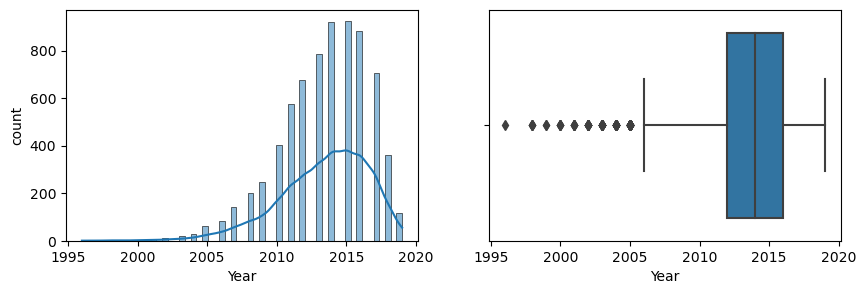

Kilometers_Driven
Skew : 3.87


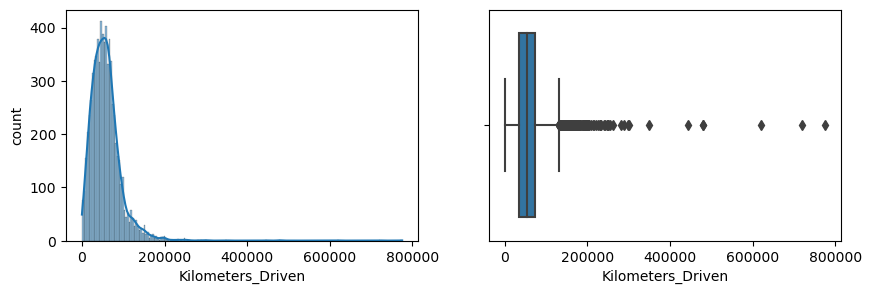

Mileage
Skew : 0.2


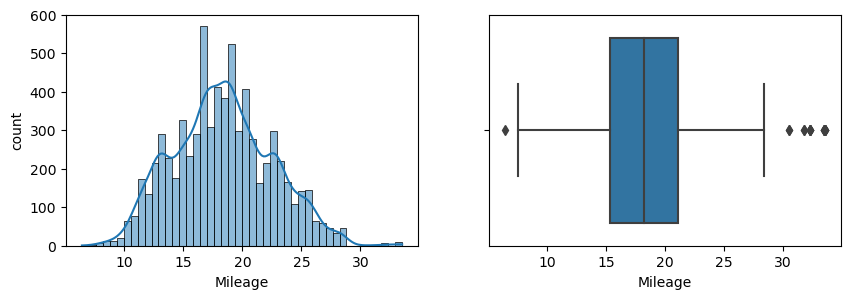

Engine
Skew : 1.42


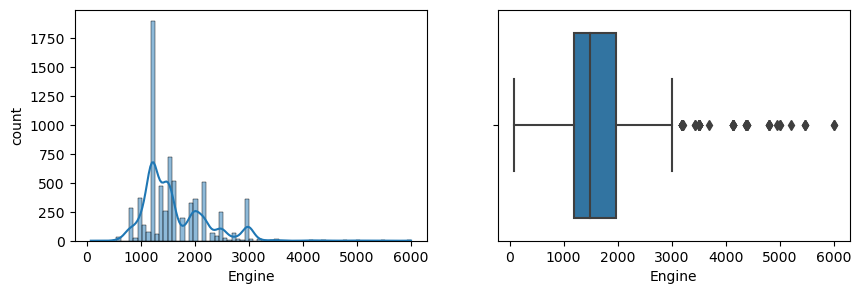

Power
Skew : 1.97


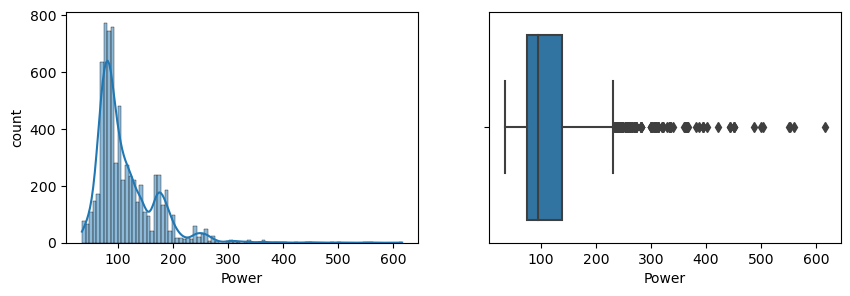

Seats
Skew : 1.95


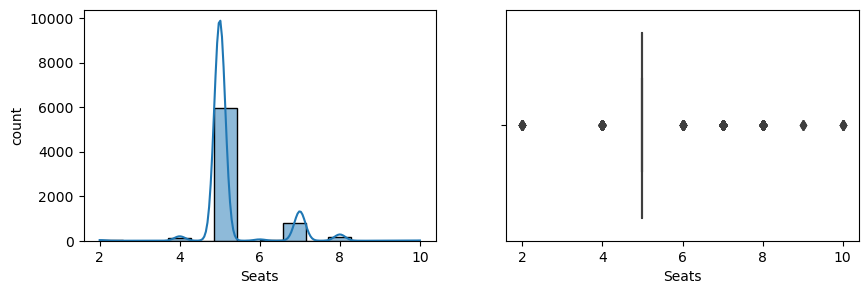

New_price
Skew : 4.15


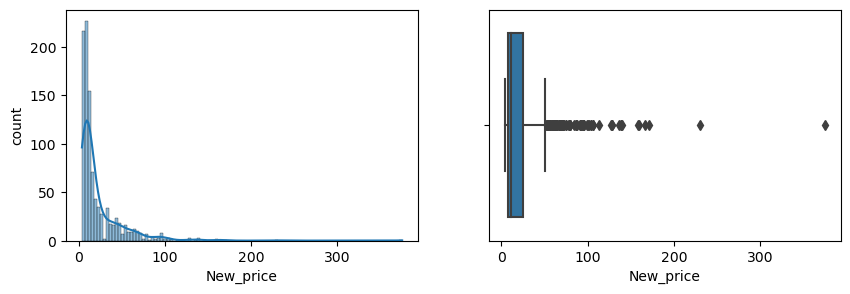

Price
Skew : 3.38


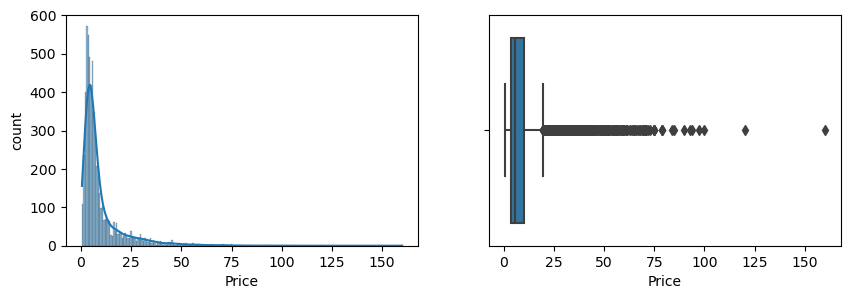

In [24]:
# Histogram and boxplot of Numerical Features

cont_cols = list(df_numerical_features.columns)

for col in cont_cols:

    print(col)
    print('Skew :',round(df_numerical_features[col].skew(),2))
    plt.figure(figsize = (10, 3))
    plt.subplot(1, 2, 1)
    sns.histplot(data = df_numerical_features, x= col, kde = True)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = df_numerical_features[col])
    
    plt.show()

**Observations:**
- The Year is skewed to the left which shows that the majority of the used cars are from most recent years
- We  can appreciate a better view of the Engine, which is skewed to the right showing that most of the cars range from the 1000 to the 2000 cc which means that there are mostly small family cars. The more powerful cars or big engines represent the minority of the dataset and the bigets ones are ouliers which means that there can only be few of them.
- The Power has a similar behaviour of the Engine. It has a long tail to the reight which means that the majority of cars are smaller
- Kilometers Driven and Price are highly skewed to the right. We will be calculating the log of both features in order to include more normilized amount in our model

### **Log Transformation**
- We are applying log transformation to Kilometers_Driven and Price as both variables are heavily skewed to the Right. We will replace the values whith Kilometers_Driven_log and Price_log respectively to use a more normalized distribution in our model. 

In [25]:
# Log transformation of Kilometers Driven

df_data['Kilometers_Driven_log'] = np.log(df_data['Kilometers_Driven'])

<AxesSubplot:xlabel='Kilometers_Driven_log'>

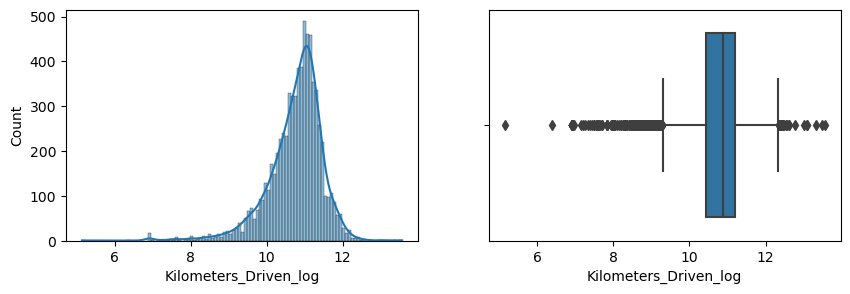

In [26]:
# New Visual representation of the log of Kilometers Driven

plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
sns.histplot(data = df_data, x = 'Kilometers_Driven_log', kde = True)
# sns.histplot(data = df_numerical_features, x= col, kde = True)
# plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x = df_data.Kilometers_Driven_log)

In [27]:
df_data['Price_log'] = np.log(df_data['Price'])

<AxesSubplot:xlabel='Price_log'>

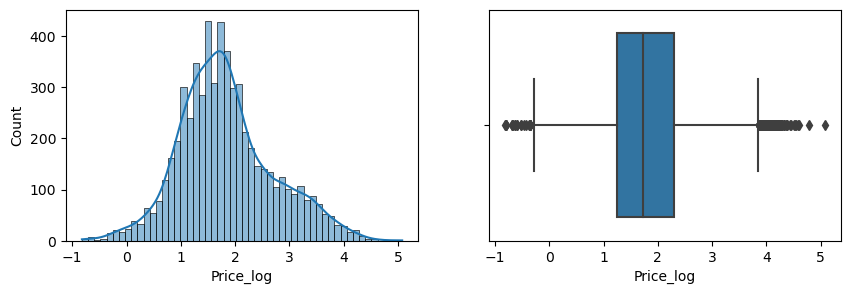

In [28]:
# New Visual representation of the log of Price

plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
sns.histplot(data = df_data, x = 'Price_log', kde = True)
# sns.histplot(data = df_numerical_features, x= col, kde = True)
# plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x = df_data.Price_log)

### Categorical Features

In [29]:
# Categorical Features
for i in df_categorical_features:
    if i != 'Name':    #Excluding Name from the Analysis as it does not add value at this point
        print(i ,":")
        print(df_categorical_features[i].value_counts(normalize = True))
    
    print('*' * 50)

**************************************************
Location :
Mumbai       0.13
Hyderabad    0.12
Kochi        0.11
Coimbatore   0.11
Pune         0.11
Delhi        0.09
Kolkata      0.09
Chennai      0.08
Jaipur       0.07
Bangalore    0.06
Ahmedabad    0.04
Name: Location, dtype: float64
**************************************************
Fuel_Type :
Diesel     0.53
Petrol     0.46
CNG        0.01
LPG        0.00
Electric   0.00
Name: Fuel_Type, dtype: float64
**************************************************
Transmission :
Manual      0.72
Automatic   0.28
Name: Transmission, dtype: float64
**************************************************
Owner_Type :
First            0.82
Second           0.16
Third            0.02
Fourth & Above   0.00
Name: Owner_Type, dtype: float64
**************************************************


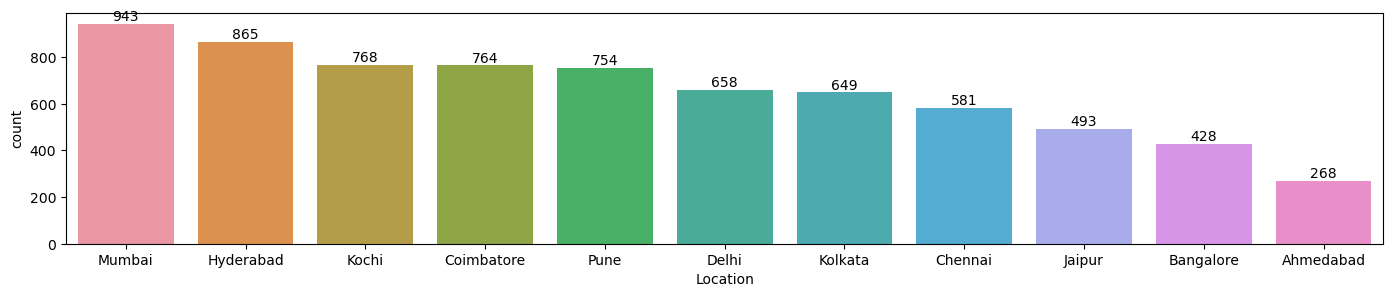

In [30]:
# Count plot for Location
plt.figure(figsize=(17, 3))

Location = sns.countplot(df_categorical_features.Location, order = df_categorical_features.Location.value_counts(normalize = True).index)

for container in Location.containers:
    Location.bar_label(container)

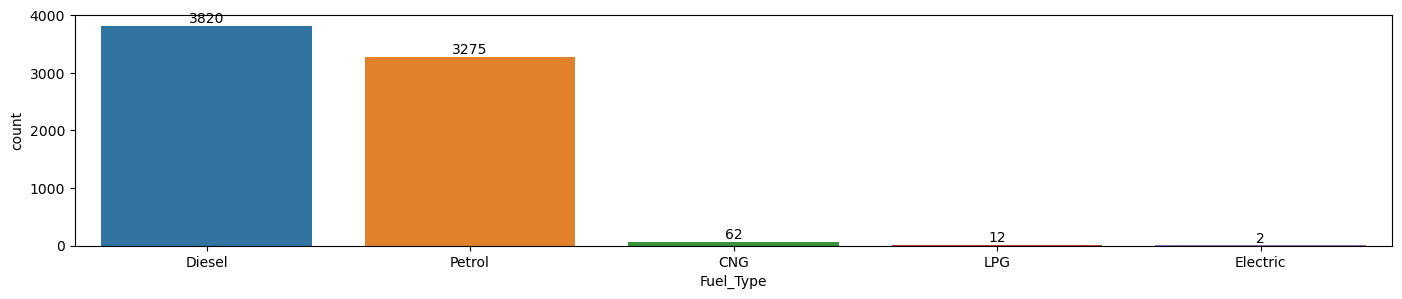

In [31]:
# Count plot for Fuel Type
plt.figure(figsize=(17, 3))

FuelType = sns.countplot(df_categorical_features.Fuel_Type, order = df_categorical_features.Fuel_Type.value_counts(normalize = True).index)

for container in FuelType.containers:
    FuelType.bar_label(container)

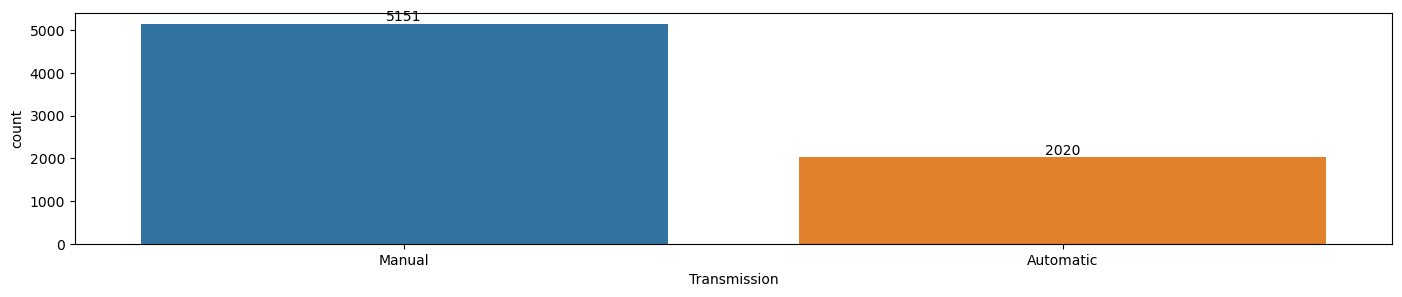

In [32]:
# Count plot for Transmission
plt.figure(figsize=(17, 3))

Transmission = sns.countplot(df_categorical_features.Transmission, order = df_categorical_features.Transmission.value_counts(normalize = True).index)

for container in Transmission.containers:
    Transmission.bar_label(container)

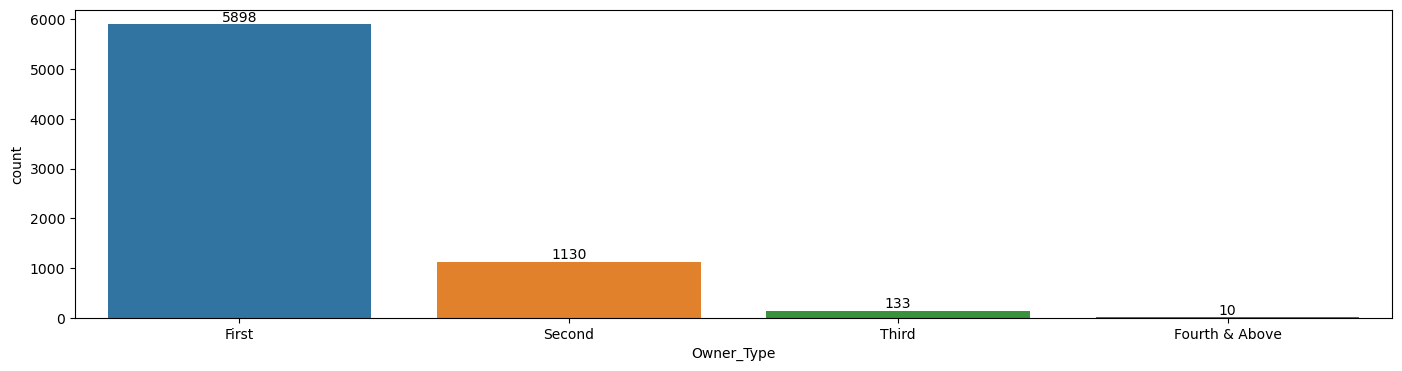

In [33]:
# Count plot for Owner Type
plt.figure(figsize=(17,4))

OwnerType  = sns.countplot(df_categorical_features.Owner_Type, order = df_categorical_features.Owner_Type.value_counts(normalize = True).index)

for container in OwnerType.containers:
    OwnerType.bar_label(container)

**Observations:**
- Location:
    * Mumbai is the city with the highest amount of used cars with 13% of the total followed by Hyderabad with 12% - these two cities make almost 25% of the total
    * Kochi, Coimbatore and Pune hold 33% of the total with 11% of participation each.
    * The third big group will be Delhi and Kolkata with 18% of the total combining both cities.
- Fuel Type:
    * The two main categories of fuel are Diesel 56% and Petrol 43%
    * The rest of the categories are minorities
- Transmission: 72% of the cars are manual and 28% are Automatic
- Owner Type: 82% of the cars are First Owner which can bea strength in sales for Used Cars.

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

### **Correlation Matrix**

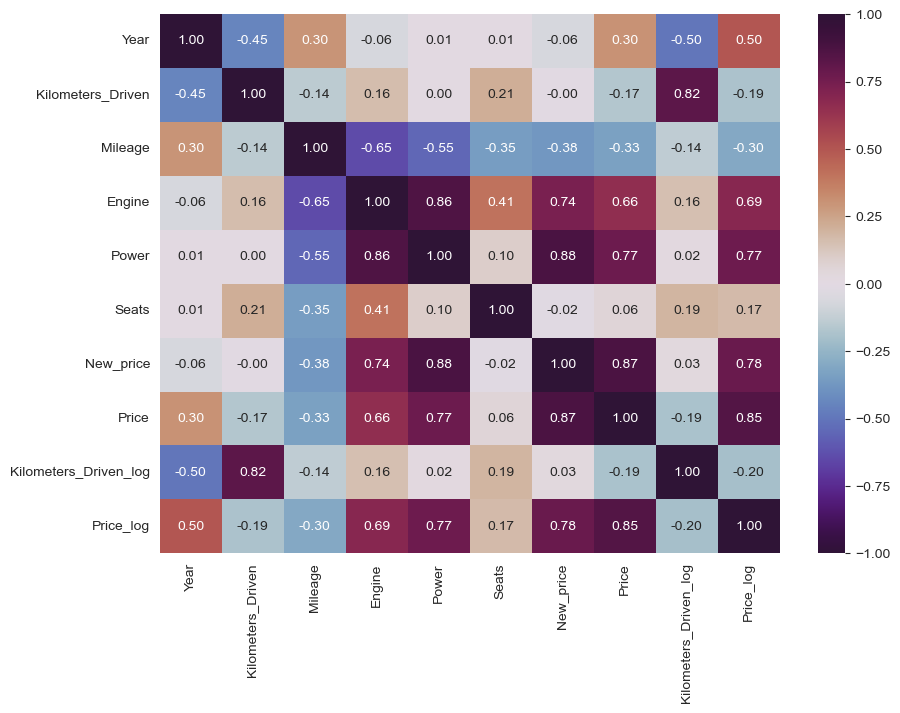

In [34]:
# Correlation plot to understand the interaction between the variables
sns.set_style('whitegrid')
cols_list = df_data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (10, 7))
sns.heatmap(
    df_data[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "twilight_shifted"
)
plt.show()

The three main correlations with the transformed Price_log are:

- Price_log and Power
- Price_log and Engine
- Price_log and Year

Let's have a look at the scatter plots for those correlations

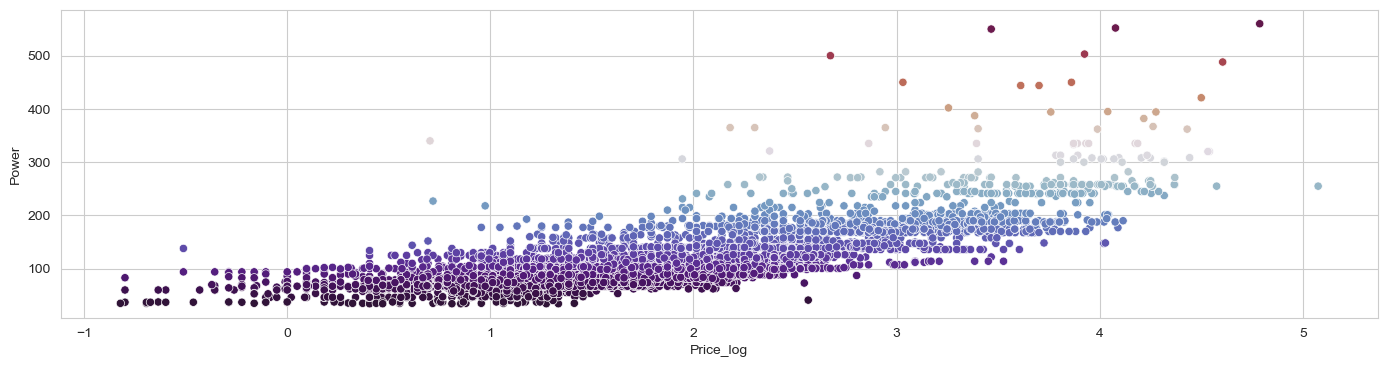

In [35]:
# Price_log and Power

plt.figure(figsize = (17, 4))
sns.scatterplot(data = df_data, x = 'Price_log', y = 'Power',
                hue='Power', palette='twilight_shifted', legend=False )

plt.show()

**Observations**
* There is a positive correlation between Price_log and Power meaningthat the more Power the higher the Price

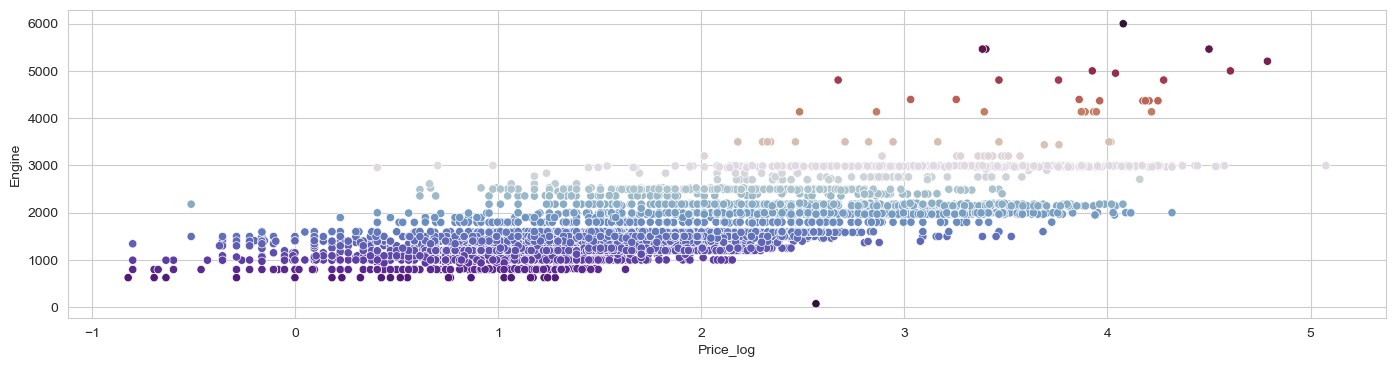

In [36]:
# Price_log and Engine

plt.figure(figsize = (17, 4))
sns.scatterplot(data = df_data, x = 'Price_log', y = 'Engine',
                hue='Engine', palette='twilight_shifted', legend=False )

plt.show()

**Observations**
* There is a positive but subtle correlation between the Engine and the Price. This can be affected by the ouliers that have more powerful Engines and are more expensive. However, we can clearly see in the strongest relationship can be found in the mid range of the chart with higher correlation in the smaller engines and the mid range price

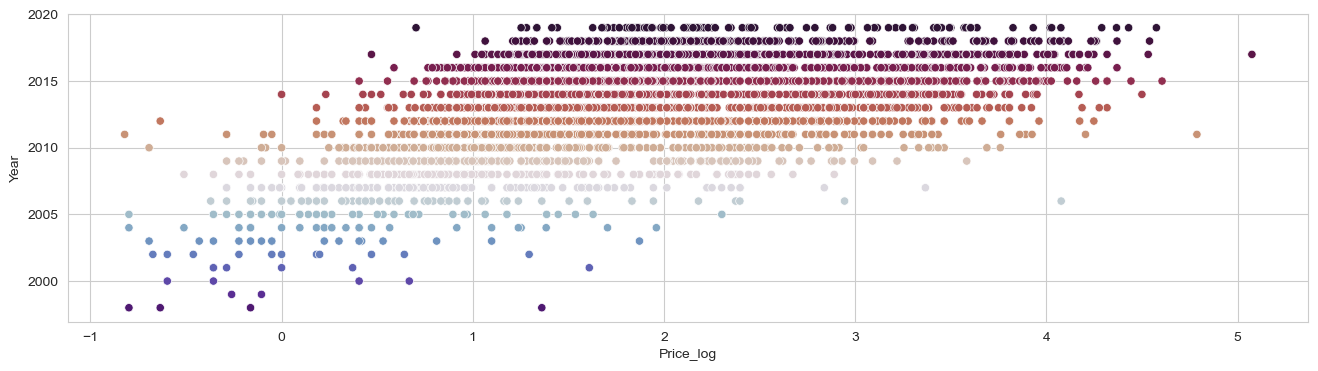

In [37]:
# Price_log and Year

plt.figure(figsize = (16, 4))
sns.scatterplot(data = df_data, x = 'Price_log', y = 'Year',
                hue='Year', palette='twilight_shifted', legend=False )

plt.show()

**Observations**
* There is a correlation between Price and Year however not too clear. This can be due to other factors or features that can influence the Price of thecaras. However you can see that the majority or thestrongest correlation sits at the top of the chart meaning that the newer the car thehigher the price.

## **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [38]:
#Extract the Brand Name from the Name
df_data['Brand_Name'] = df_data['Name'].apply(lambda x: x.split(" ")[0])

In [39]:
print(df_data.Brand_Name)

0              Maruti
1             Hyundai
2               Honda
3              Maruti
4                Audi
            ...      
7248       Volkswagen
7249       Volkswagen
7250           Nissan
7251       Volkswagen
7252    Mercedes-Benz
Name: Brand_Name, Length: 7171, dtype: object


In [40]:
print(df_data.Name)

0                                  Maruti Wagon R LXI CNG
1                        Hyundai Creta 1.6 CRDi SX Option
2                                            Honda Jazz V
3                                       Maruti Ertiga VDI
4                         Audi A4 New 2.0 TDI Multitronic
                              ...                        
7248                    Volkswagen Vento Diesel Trendline
7249                               Volkswagen Polo GT TSI
7250                               Nissan Micra Diesel XV
7251                               Volkswagen Polo GT TSI
7252    Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...
Name: Name, Length: 7171, dtype: object


In [41]:
#extract the Model from the Name
df_data['Model'] = df_data['Name'].apply(lambda x: x.split(" ")[1])

In [42]:
print(df_data.Model)

0         Wagon
1         Creta
2          Jazz
3        Ertiga
4            A4
         ...   
7248      Vento
7249       Polo
7250      Micra
7251       Polo
7252    E-Class
Name: Model, Length: 7171, dtype: object


In [43]:
# Make sure that the Brand Name and the Model are properly seggregated by looking at the first fefw rows of data.
df_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_log,Price_log,Brand_Name,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.00,58.16,5.00,NaN,1.75,11.18,0.56,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,"1,582.00",126.20,5.00,NaN,12.50,10.62,2.53,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,"1,199.00",88.70,5.00,8.61,4.50,10.74,1.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,"1,248.00",88.76,7.00,NaN,6.00,11.37,1.79,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,"1,968.00",140.80,5.00,NaN,17.74,10.61,2.88,Audi,A4


## **Missing Value Treatment**

### **1. Determine how many and what features contain missing values** 

In [44]:
df_data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     34
Power                     130
Seats                      39
New_price                6169
Price                    1221
Kilometers_Driven_log       0
Price_log                1221
Brand_Name                  0
Model                       0
dtype: int64

In [45]:
# Determine the percentage of missingvalues per column in the dataset
(df_data.isnull().sum() / df_data.shape[0])*100

Name                     0.00
Location                 0.00
Year                     0.00
Kilometers_Driven        0.00
Fuel_Type                0.00
Transmission             0.00
Owner_Type               0.00
Mileage                  0.03
Engine                   0.47
Power                    1.81
Seats                    0.54
New_price               86.03
Price                   17.03
Kilometers_Driven_log    0.00
Price_log               17.03
Brand_Name               0.00
Model                    0.00
dtype: float64

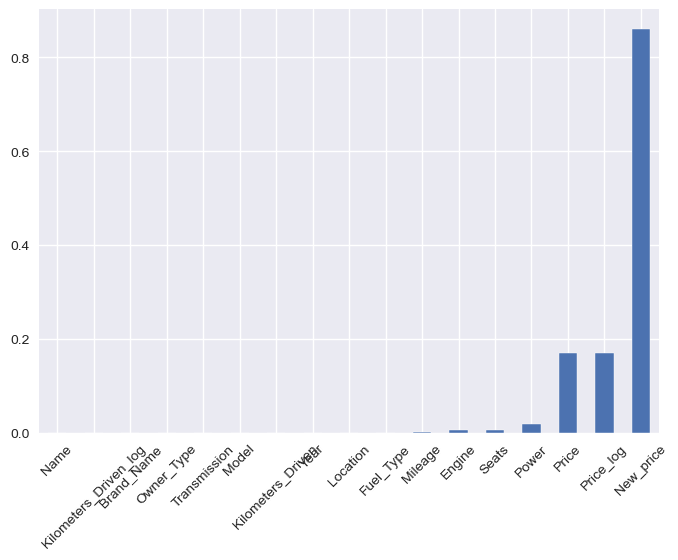

In [46]:
# Visualize the missing data
with plt.style.context("seaborn"):
    df_data.isnull().mean().sort_values(ascending = True).plot.bar(rot = 45)
    plt.show()

**Observations:**

The majority of missingdata is the New Price and Price. We will be imputing values to complete the dataset and also we will deat with the Fuel Type, Engine, Seats and Power.

### **2. Impute Missing Values in Mileage** 

In [47]:
# Impute missing values in Mileage
df_data['Mileage'].fillna(value = df_data['Mileage'].mean(), inplace = True)

In [48]:
df_data['Mileage'].isnull().sum()

0

### **3. Impute Missing Values in Engine** 

In [49]:
# Impute missing values in Engine
df_data['Engine'].fillna(value = (df_data['Engine'].mean()), inplace = True)

In [50]:
df_data['Engine'].isnull().sum()

0

### **4. Impute Missing Values in Seats** 

In [51]:
AmountToImpute = df_data[['Brand_Name', 'Model','Seats']]
AmountToImpute['Seats'].mean()

5.282108805384184

In [52]:
df_Seats = df_data[df_data['Seats'].isnull()][['Brand_Name', 'Model','Seats']]

In [53]:
df_data['Seats'].mean()

5.282108805384184

In [54]:
df_Seats = df_data[df_data['Seats'].isnull()][['Brand_Name', 'Model','Seats']]
print(df_Seats)

     Brand_Name      Model  Seats
208      Maruti      Swift    NaN
733      Maruti      Swift    NaN
1294      Honda       City    NaN
1327     Maruti      Swift    NaN
1917      Honda       City    NaN
2074     Maruti      Swift    NaN
2264     Toyota      Etios    NaN
2325     Maruti      Swift    NaN
2335     Maruti      Swift    NaN
2369     Maruti     Estilo    NaN
2530        BMW          5    NaN
2623        BMW          5    NaN
2668     Maruti      Swift    NaN
2737     Maruti      Wagon    NaN
3272        BMW          5    NaN
3404     Maruti      Swift    NaN
3520        BMW          5    NaN
3800       Ford  Endeavour    NaN
3810      Honda       CR-V    NaN
3882     Maruti     Estilo    NaN
4011       Fiat      Punto    NaN
4229    Hyundai     Santro    NaN
4577        BMW          5    NaN
4604      Honda       Jazz    NaN
4697       Fiat      Punto    NaN
4712    Hyundai     Santro    NaN
4952       Fiat      Punto    NaN
5015     Maruti      Swift    NaN
5185     Marut

In [55]:
df_data['Seats'].fillna(value = df_data['Seats'].mean(), inplace = True)

In [56]:
df_data['Seats'].isnull().sum()

0

### **5. Impute Missing Values in Power** 

In [57]:
# Impute missing values in Power
df_data['Power'].fillna(value = df_data['Power'].mean(), inplace = True)

In [58]:
df_data['Power'].isnull().sum()

0

### **6. Impute Missing Values in Price_log** 

In [59]:
# Impute missing values in Price_log with Nilas there are only 1221 observation without price
df_data['Price_log'].fillna(0, inplace = True)

In [60]:
df_data['Price_log'].isnull().sum()

0

### **7. Impute Missing Values in New_Price** 

In [61]:
# Impute missing values in New_Price with nil as most of the observaton have no Ne Price
df_data['New_price'].fillna(0, inplace = True)

In [62]:
df_data['New_price'].isnull().sum()

0

### **8. Check for Missing Values in th whole dataset** 

In [63]:
# Drop Kilometers_Driven and Price as they are not needed any longer in the dataset for modeling
# df_data.drop(['Price','Kilometers_Driven'], axis = 1, inplace=True)

In [64]:
df_data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                    1221
Kilometers_Driven_log       0
Price_log                   0
Brand_Name                  0
Model                       0
dtype: int64

In [65]:
# Drop NaN in the price column
df_data.dropna(subset = ['Price'], inplace=True)

In [66]:
df_data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
Kilometers_Driven_log    0
Price_log                0
Brand_Name               0
Model                    0
dtype: int64

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

* As the **Name** column contains data that we don't need nor adds value to the prediction, this column will be dropped from the independent variables
* **Price_log** is our dependent variable i.e. We will predict price_log so this should also be dropped from the independent variables.
* **Price** was normilized and Price_log will be our dlependent varaible
* **Kilometers_driven** was normilized and we will be ulsing Kilometers_driven_log


In [67]:
df_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price', 'Kilometers_Driven_log', 'Price_log',
       'Brand_Name', 'Model'],
      dtype='object')

In [68]:
# Drop the features that do not have prediction powerinn our model and split the variables
X = df_data.drop(['Name','Price','Price_log','Kilometers_Driven'], axis = 1)
# y = df_data[["Price_log"]]
y = df_data[['Price_log', 'Price']]

In [69]:
# Check the columns were dropped
X.columns

Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'New_price',
       'Kilometers_Driven_log', 'Brand_Name', 'Model'],
      dtype='object')

In [70]:
# Check the the assignment of our dependent varaible
y.columns

Index(['Price_log', 'Price'], dtype='object')

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### 1. Linear Regression

In [71]:
# Encode the categorical variables by creating dummy variables
X = pd.get_dummies(X, drop_first = True)

In [72]:
# Split the data between train and Test data 70%/30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print('Train data : ', X_train.shape, y_train.shape)
print('Test data : ', X_test.shape, y_test.shape)

Train data :  (4165, 261) (4165, 2)
Test data :  (1785, 261) (1785, 2)


In [73]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

   
    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    
    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

In [74]:
# Create a linear regression model
lr_model = LinearRegression()

# Fit linear regression model
lr_model.fit(X_train, y_train)

LinearRegression()

In [75]:
# Checking performance on the training data
linear_reg_train = model_performance_regression(lr_model, X_train, y_train)
linear_reg_train

,RMSE,MAE,R-squared,Adj. R-squared
0,2.72,1.13,0.92,0.91


In [76]:
# Checking performance on the testing data
linear_reg_test = model_performance_regression(lr_model, X_test, y_test)
linear_reg_test

,RMSE,MAE,R-squared,Adj. R-squared
0,3.40,1.28,0.89,0.87


In [77]:
# Fitting linear model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression()                                    



cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)

cv_Score12 = cross_val_score(linearregression, X_test, y_test, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std()*2))

print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std()*2))

RSquared: 0.886 (+/- 0.065)
Mean Squared Error: 14.239 (+/- 21.102)


**Observations:**

- **The Root Mean Squared Error** and the **adjusted $R^2$** of train and test data are **very close**, indicating that **our model is not overfitting** to the training data.

- The adjusted $R^2$ of ~0.32 implies that the independent variables are able to explain ~32% variance in the target variable.

- Mean Absolute Error (MAE) indicates that the current model can predict the price of cars only 11% of the times

- The units of both RMSE and MAE are very close. But RMSE is greater than MAE because it penalizes the outliers more.

- **Mean Absolute Percentage Error is ~50%** on the test data, indicating that the average difference between the predicted value and the actual value is ~50%.

### 2. Ridge Regression

In [78]:
ridge_model = Ridge() #creating Ridge Regression model
ridge_model.fit(X_train, y_train) # Fitting the data into the model

Ridge()

In [79]:
# Getting performance metrics on train data
ridge_reg_train = model_performance_regression(ridge_model, X_train, y_train)
ridge_reg_train

,RMSE,MAE,R-squared,Adj. R-squared
0,2.80,1.17,0.92,0.91


In [80]:
# Getting performance metrics on test data
ridge_reg_test = model_performance_regression(ridge_model, X_test, y_test)
ridge_reg_test

,RMSE,MAE,R-squared,Adj. R-squared
0,3.36,1.31,0.89,0.87


**Observations:**

- The performance metrics are showing almost similar results as compared to the SK Leanrn Linear Regression Model

In [81]:
# Ridge regression with Optimized Alpha
folds = KFold(n_splits=10, shuffle=True, random_state=1) 
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]} 
model = Ridge()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [82]:
 #getting optimised parameters for alpha
model_cv.best_params_

{'alpha': 1}

In [83]:
 #creating Tuned Ridge Regression model using optimised alpha value
ridge_model_tuned = Ridge(alpha=0.1)

 # Fitting the data into the tuned model
ridge_model_tuned.fit(X_train, y_train)

Ridge(alpha=0.1)

In [84]:
 #getting performance metrics on Train data
ridge_reg_tuned_train = model_performance_regression(ridge_model_tuned, X_train, y_train)
ridge_reg_tuned_train

,RMSE,MAE,R-squared,Adj. R-squared
0,2.73,1.14,0.92,0.91


In [85]:
 #getting performance metrics on test data
ridge_reg_tuned_test = model_performance_regression(ridge_model_tuned, X_test, y_test)
ridge_reg_tuned_test

,RMSE,MAE,R-squared,Adj. R-squared
0,3.38,1.28,0.89,0.87


**Observations:**

- After applying the Grid SearchCV, the optimized value of alpha results out to be 0.1.
- It can be observed that after tuning the parameters of Ridge Regression, the performance parameters does not change implying that Ridge Regression does not help in improving the model.

### 3. Lasso Regression

#### Lasso Regression with default parameters

In [86]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [87]:
lasso_reg_train = model_performance_regression(lasso_model, X_train, y_train)
lasso_reg_train

,RMSE,MAE,R-squared,Adj. R-squared
0,4.22,1.99,0.70,0.68


In [88]:
lasso_reg_test = model_performance_regression(lasso_model, X_test, y_test)
lasso_reg_test

,RMSE,MAE,R-squared,Adj. R-squared
0,4.41,2.00,0.70,0.65


**Observations:**

- After fitting the data into Lasso Regression Model with default value of alpha (=1), the performance metrics are showing poor results as compared to Least Squares method and Ridge Regression.
- We can tune the alpha to get the optimized value similar to Ridge Regression using Grid SearchCV.

#### Lasso regression with Optimized $\large\alpha$

In [89]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [90]:
model_cv.best_params_

{'alpha': 0.001}

In [91]:
lasso_model_tuned = Lasso(alpha=0.001)
lasso_model_tuned.fit(X_train, y_train)

Lasso(alpha=0.001)

In [92]:
lasso_reg_tuned_train = model_performance_regression(lasso_model_tuned, X_train, y_train)
lasso_reg_tuned_train

,RMSE,MAE,R-squared,Adj. R-squared
0,2.75,1.16,0.90,0.90


In [93]:
lasso_reg_tuned_test = model_performance_regression(lasso_model_tuned, X_test, y_test)
lasso_reg_tuned_test

,RMSE,MAE,R-squared,Adj. R-squared
0,3.38,1.30,0.87,0.85


**Observation:**

- After applying the Grid SearchCV, the optimized value of alpha results out to be 0.001.
- The performance metrics are showing similar results as compared to Least Squares method and Ridge Regression, implying that after adding the penalty, the model does not improve. 

### **4. Decision Tree**

In [94]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=1)

# Fitting the model
dt_regressor.fit(X_train, y_train)

# Model Performance on Train data
dtree_train_perf = model_performance_regression(dt_regressor, X_train, y_train)
dtree_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,0.01,0.00,1.00,1.00


**Observation:** The Decision tree Model is **overfitting** on the **training data**

In [95]:
# Model Performance on Test data
dtree_test_perf = model_performance_regression(dt_regressor, X_test, y_test)
dtree_test_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,3.76,1.02,0.83,0.80


#### Hyperparameter Tuning - Decision Tree: 

In [96]:
%%time 

# Choose the type of classifier
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(15,20)) + [None], 
              'min_samples_leaf': [1, 3] + [None],
              'max_leaf_nodes' : [5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5, n_jobs = -1, verbose = 2, n_iter = 100)
randomized_cv = randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 10, 'max_depth': 15} with CV score=0.6969467518756127:
Wall time: 4.09 s


In [97]:
dtree_tuned = DecisionTreeRegressor(
    random_state=1,
    max_depth=16,
    min_samples_leaf=3,
    max_leaf_nodes=None,
    min_impurity_decrease=0.001,
)

dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=16, min_impurity_decrease=0.001,
                      min_samples_leaf=3, random_state=1)

In [98]:
# Model Performance on Train data
dtree_tuned_train_perf = model_performance_regression(dtree_tuned, X_train, y_train)
dtree_tuned_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,1.51,0.60,0.96,0.95


**Observation:** After Tuning the Decision Tree Model, the performance inproves

In [99]:
# Model Performance on Test data
dtree_tuned_test_perf = model_performance_regression(dtree_tuned, X_train, y_train)
dtree_tuned_test_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,1.51,0.60,0.96,0.95


#### **Feature Importance**

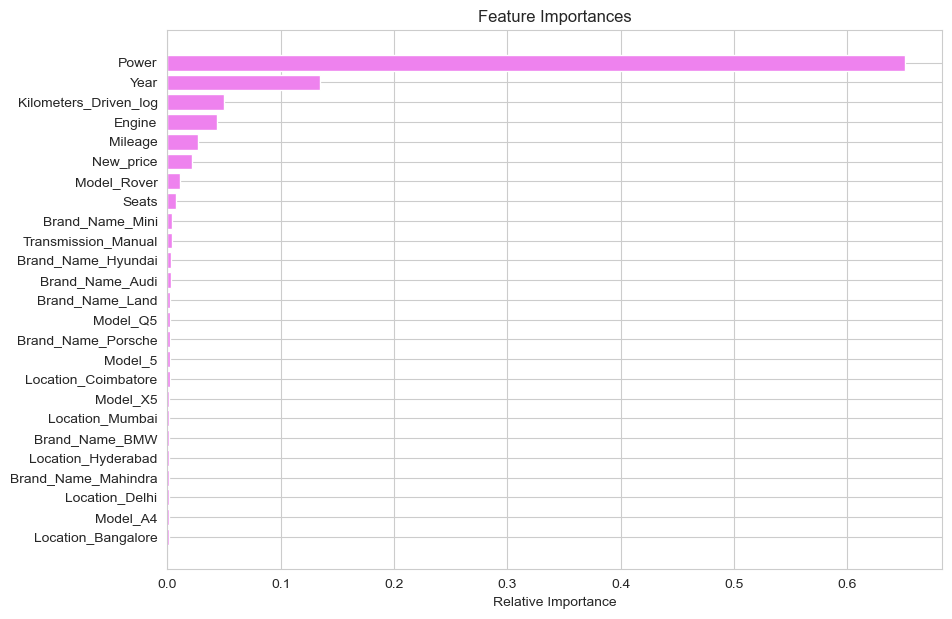

In [100]:
feature_names = X_train.columns
importances = dt_regressor.feature_importances_
indices = np.argsort(importances)


# customized number 
num_features = 25 

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(num_features), importances[indices[-num_features:]], color="violet", align="center")
plt.yticks(range(num_features), [feature_names[i] for i in indices[-num_features:]])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

The Features that heve most impact on the Price are (in descending order):
   * Power 
   * Year
   * Kilometers Driven
   * Engine
   * Mileage
   * New Price
   * Model
   * Seats

### **5. Random Forest**

In [101]:
#Random Forest Estimator
rf_estimator = RandomForestRegressor(random_state=1)

# Fitting the model
rf_estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [102]:
# # Model Performance on Train data
rf_estimator_train_perf = model_performance_regression(
    rf_estimator, X_train, y_train
)
rf_estimator_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,0.92,0.29,0.99,0.99


In [103]:
# # Model Performance on Test data
rf_estimator_test_perf = model_performance_regression(rf_estimator, X_test, y_test)
rf_estimator_test_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,2.55,0.78,0.92,0.90


#### Hyperparameter Tuning: Random Forest

In [104]:
%%time 

rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(rf_tuned, parameters, scoring=scorer, n_iter=40, n_jobs = -1, cv=5, random_state=1)
randomized_cv = randomized_cv.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'max_features': None, 'max_depth': None} with CV score=0.9111306040929392:
Wall time: 45.3 s


In [105]:
# Creating new pipeline with best parameters
rf_tuned = RandomForestRegressor(
    random_state=1,
    max_depth=None,
    max_features=None,
    n_estimators=110
)

rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features=None, n_estimators=110, random_state=1)

In [106]:
# Performance of the Optimized model with train Data
rf_tuned_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
rf_tuned_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,0.92,0.29,0.99,0.99


In [107]:
# Performance of the Optimized model with Test Data
rf_tuned_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
rf_tuned_test_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,2.55,0.78,0.92,0.90


#### **Feature Importance**

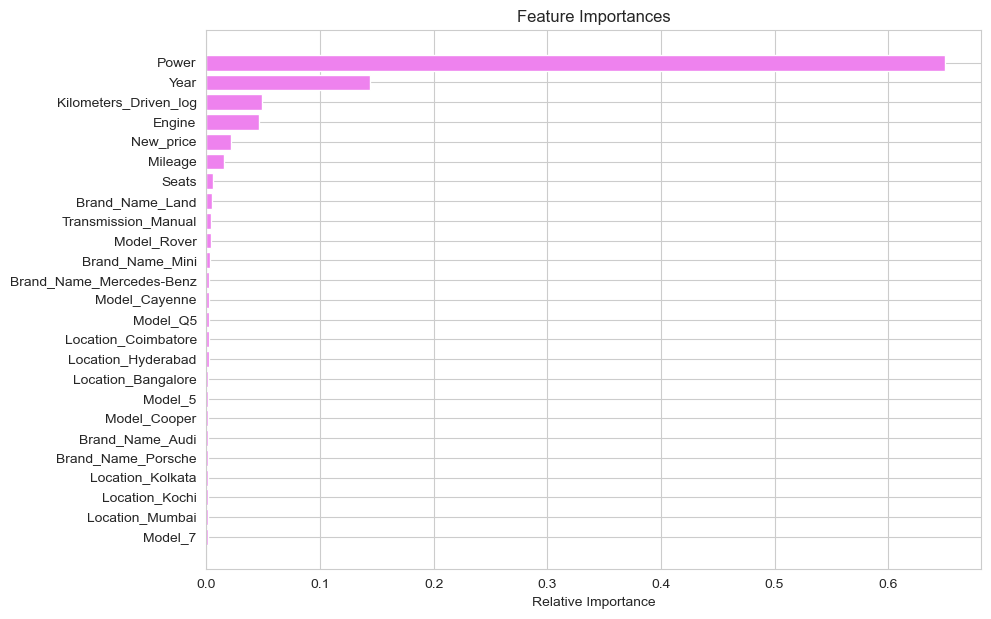

In [108]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 25 

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(num_features), importances[indices[-num_features:]], color="violet", align="center")
plt.yticks(range(num_features), [feature_names[i] for i in indices[-num_features:]])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

The Features that heve most impact on the Price are (in descending order):
   * Power 
   * Year
   * Kilometers Driven
   * New Price
   * Mileage
   * Seats
   * Model

## Model Performance Analysis

### Analysis for the Training Data set

In [109]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        linear_reg_train.T,
        ridge_reg_train.T,
        ridge_reg_tuned_train.T,
        lasso_reg_train.T,
        lasso_reg_tuned_train.T,
        dtree_train_perf.T,
        dtree_tuned_train_perf.T,
        rf_estimator_train_perf.T,
        rf_tuned_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Linear Regression Train",
    "Ridge Regression Train",
    "Ridge Regression Optimized Train",
    "Lasso Regression Train",
    "Lasso Regression Optimized Train",
    "Decission Tree Regression Train",
    "Decission Tree  Regression Optimized Train",
    "Random Forest Regression Train",
    "Random Forest  Regression Optimized Train",
]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared
Linear Regression Train,2.72,1.13,0.92,0.91
Ridge Regression Train,2.80,1.17,0.92,0.91
Ridge Regression Optimized Train,2.73,1.14,0.92,0.91
Lasso Regression Train,4.22,1.99,0.70,0.68
Lasso Regression Optimized Train,2.75,1.16,0.90,0.90
Decission Tree Regression Train,0.01,0.00,1.00,1.00
Decission Tree Regression Optimized Train,1.51,0.60,0.96,0.95
Random Forest Regression Train,0.92,0.29,0.99,0.99
Random Forest Regression Optimized Train,0.92,0.29,0.99,0.99


### Analysis for the Testing Data set

In [110]:
# Test performance comparison

models_test_comp_df = pd.concat(
    [
        linear_reg_test.T,
        ridge_reg_test.T,
        ridge_reg_tuned_test.T,
        lasso_reg_test.T,
        lasso_reg_tuned_test.T,
        dtree_test_perf.T,
        dtree_tuned_test_perf.T,
        rf_estimator_test_perf.T,
        rf_tuned_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Linear Regression Test",
    "Ridge Regression Test",
    "Ridge Regression Optimized Test",
    "Lasso Regression Test",
    "Lasso Regression Optimized Test",
    "Decission Tree Regression Test",
    "Decission Tree  Regression Optimized Test",
    "Random Forest Regression Test",
    "Random Forest  Regression Optimized Test",
]
print("Test performance comparison:")
models_test_comp_df.T

Test performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared
Linear Regression Test,3.40,1.28,0.89,0.87
Ridge Regression Test,3.36,1.31,0.89,0.87
Ridge Regression Optimized Test,3.38,1.28,0.89,0.87
Lasso Regression Test,4.41,2.00,0.70,0.65
Lasso Regression Optimized Test,3.38,1.30,0.87,0.85
Decission Tree Regression Test,3.76,1.02,0.83,0.80
Decission Tree Regression Optimized Test,1.51,0.60,0.96,0.95
Random Forest Regression Test,2.55,0.78,0.92,0.90
Random Forest Regression Optimized Test,2.55,0.78,0.92,0.90


## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better?


The Linear Regression, Ridge Regression and Ridge Regression Optimized perform well with 89% accuracy on the prediction and around 1.3 average error when making a prediction. It would be better if those models' MAE values were closer to 0. The Average Weighted Performance (RMSE) could be more consistent as I would like to see numbers close to 0 for this performance metric.

Even though the Random Forrest Regression and Random Forrest Regression Optimized show excellent predicting power, the average weighted performance (RMSE) is very high or needs further investigation (2.55). This draws my attention and makes this model weaker in overall prediction power. Occasional large errors in the prediction model could also cause this.

The more balanced prediction model is the Decision Tree Regression Optimized model, which performs very well for the training and the testing data with an R-squared of 96% and an Average error MAE of 0.6. These metrics make this model the most preferable one.

- Is there scope to improve the performance further?

There is definitelly room for improvement. It would be good to implement and compare the Ordinary Least Squares Method to provide a different view of what the predictions can be. 
I would also implement and investigate on more regressor models such as Bagging, Adaboost, gradient Boos and XGboost to see the impact on the performace on the training and testing data.

We can also drive improvement by investigating further what drives the sales of used cars in the cities with the most cars, i.e. Mumbai, Hyderabad, Kochi, Coimbatore and Pune, to focus sales efforts on those cities or determine whether or not it would be more beneficial to drive sales efforts with fewer cars but higher profits. 


Additionally, since Diesel and Petrol fuel types are so close (53% and 43% respectively), and Manual and Automatic (72% / 28%) we need to assess which cars will sell better and faster and the impact on profits. We need to determine the cost-benefit of investing sales efforts in each car category. 


Having 82% of the cars coming from a Fisrt hand owner is definitely a major strentgh that we can leverage to increase our sales.



**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

There is a clear opportunity to penetrate the market of Used Cars specially in  Mumbai, Hyderabad, Kochi, Coimbatore and Pune. These cities capture the majority of the market and with the apropriate combination of price strategies there will bee room to capture a big portio of the total market. The focus will be the main features that drive the Used Cars Price (Power,
Year, Kilometers Driven, Engine, Mileage, Model, Seats), Location, Fuel Type, Transmission and Owner Type.


**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

**The Decision Tree Tree Optimized** algorithms provides the best prediction power. This algorithm seems to be the most suitable to start predicting Used Cars Prices. The model has 96% of accuracy in the predictions i.e. 96% of the dependent variable (Price_log) can be predicted or explained by the independent features. In this case, we found that the most signigficant features that affect price are:

 * Power 
 * Year
 * Kilometers Driven
 * Engine
 * Mileage
 * Model
 * Seats
 
This model also shows and average error when making a prediction of 0.6 whichis outstanding. 